In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
import cv2 
from sklearn.decomposition import PCA 


In [6]:
# load the data
data = pickle.load(open("./data_images_100_100.pkl" , mode = 'rb'))


Steps to find the eigen images for each image:

1. Compute the mean image : avg each pixel using values from all images 
2. Just to verify or check out : Visualize mean face 
3. Subtract meanface from cropped images
4. Pass these differenced pixels to PCA to get the eigen faces(number of columns based on elbow method ) 
5. Use the inverse Transform to get them to original shape (10000 columns)
6. 

In [7]:
data.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_9991', 'pixel_9992', 'pixel_9993', 'pixel_9994', 'pixel_9995',
       'pixel_9996', 'pixel_9997', 'pixel_9998', 'pixel_9999', 'gender'],
      dtype='object', length=10001)

In [11]:
X = data.iloc[:,:-1] 
y = data.iloc[:,-1]

In [12]:
# Mean face 

mean_face = X.mean(axis = 0) 
mean_face

pixel_0       0.373646
pixel_1       0.370550
pixel_2       0.366710
pixel_3       0.364450
pixel_4       0.359815
                ...   
pixel_9995    0.377339
pixel_9996    0.380002
pixel_9997    0.379701
pixel_9998    0.379353
pixel_9999    0.380552
Length: 10000, dtype: float64

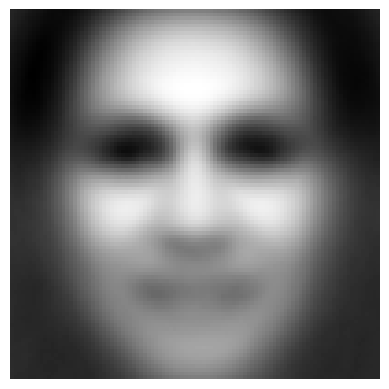

In [13]:
# Visualize the mean face 

plt.imshow(np.reshape(mean_face  ,(100,100)),cmap = 'grey')

plt.axis('off')
plt.show()

In [14]:
X_t = X - mean_face 

# transformed data 

In [16]:
pca = PCA(n_components = None , whiten = True , svd_solver = 'auto' )
pca.fit(X_t)

,n_components,None
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [17]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1 , len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.251420,0.251420,1
1,0.116404,0.367824,2
2,0.105648,0.473472,3
3,0.052002,0.525474,4
4,0.033041,0.558515,5


In [18]:
exp_var_df.set_index('principal_components' , inplace = True)

In [19]:
exp_var_df.head()

,explained_var,cum_explained_var
principal_components,,
1,0.251420,0.251420
2,0.116404,0.367824
3,0.105648,0.473472
4,0.052002,0.525474
5,0.033041,0.558515


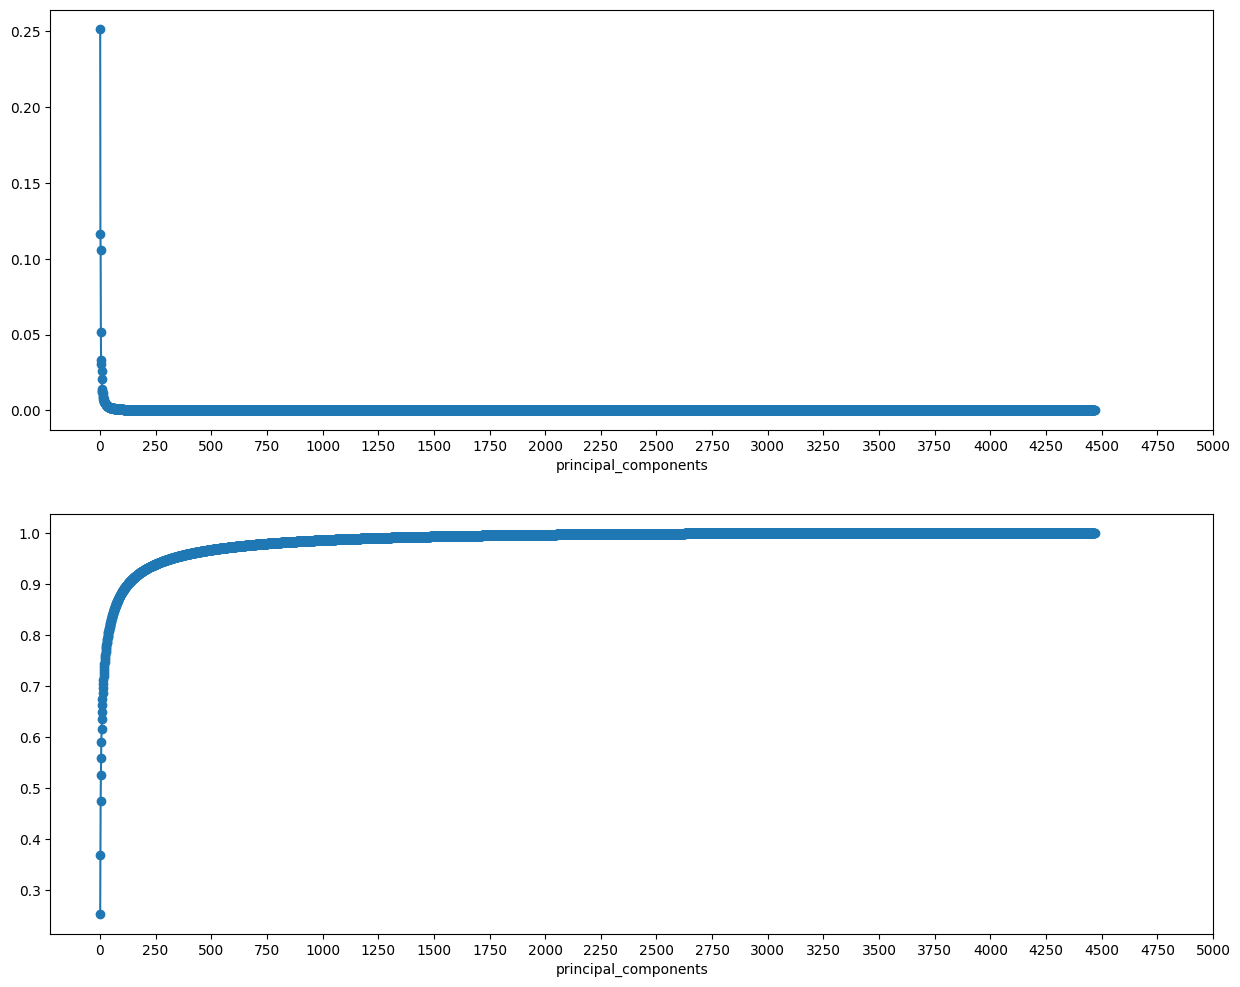

In [25]:
fig , ax = plt.subplots(nrows = 2 , figsize = (15,12))
exp_var_df['explained_var'].plot(kind = 'line' , marker = 'o' , ax = ax[0])
exp_var_df['cum_explained_var'].plot(kind = 'line' , marker = 'o' , ax = ax[1])
xticks = np.arange(0, 5001, 250)
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
plt.show()


we can take 250 components : which are sufficiently able to capture 90 % variance in the data

In [26]:
pca_250  = PCA(n_components=250 ,  whiten = True , svd_solver = 'auto')
pca_data = pca_250.fit_transform(X_t)



In [27]:
pca_data.shape

(4468, 250)

Saving the mean_face , pca model (pca_250) and pca_data

In [30]:
np.savez('./data_pca_250_target' , pca_data , y.values)

pca_dict = {'pca':pca_250 , 'mean_face' : mean_face}

pickle.dump(pca_dict , open('./model/pca_dict.pickle' , mode = 'wb'))

In [31]:
# Visualizing the eigen images : We need to inverse transform the PCA Data 

pca_data_inv = pca_250.inverse_transform(pca_data)
pca_data_inv.shape

(4468, 10000)

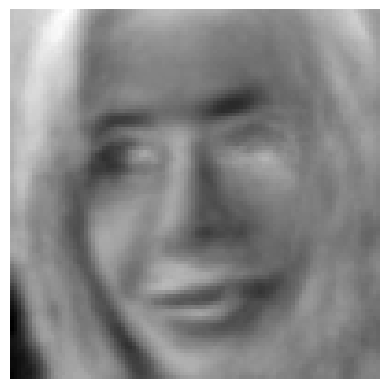

In [32]:
# Checking the eigen image for one face 

eig_img = pca_data_inv[0,:].reshape((100,100))
plt.imshow(eig_img ,cmap = 'gray')
plt.axis('off')
plt.show()

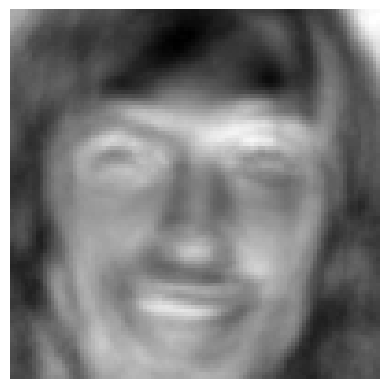

In [36]:
eig_img = pca_data_inv[3465,:].reshape((100,100))
plt.imshow(eig_img ,cmap = 'gray')
plt.axis('off')
plt.show()

In [42]:
X = X.values

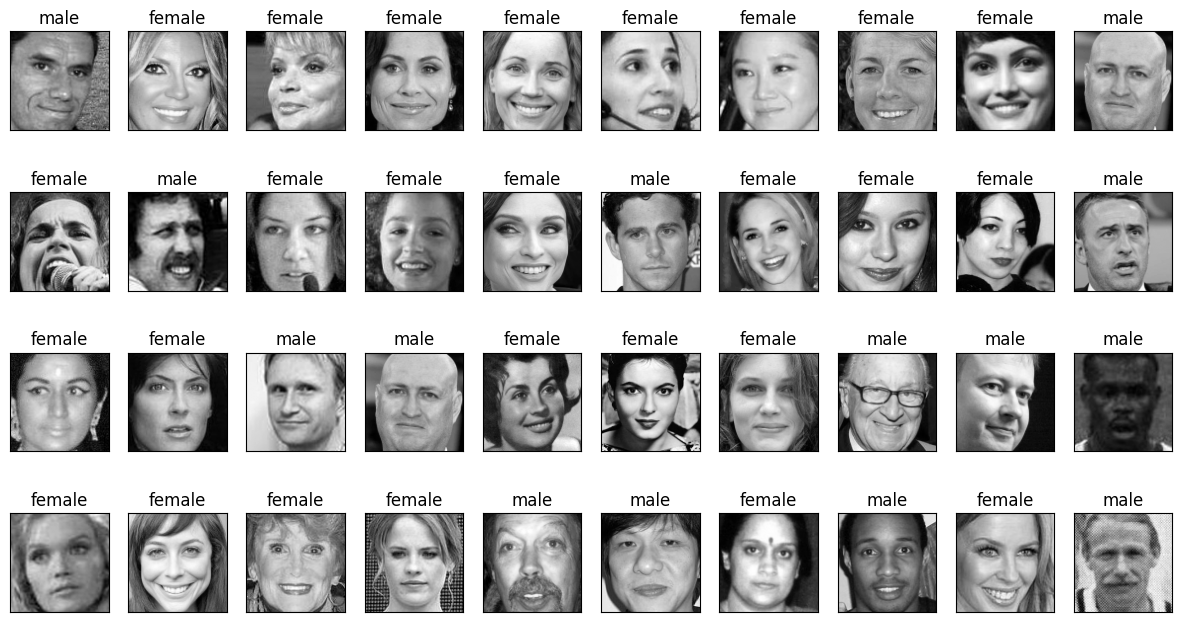

********************Eigen Image====================


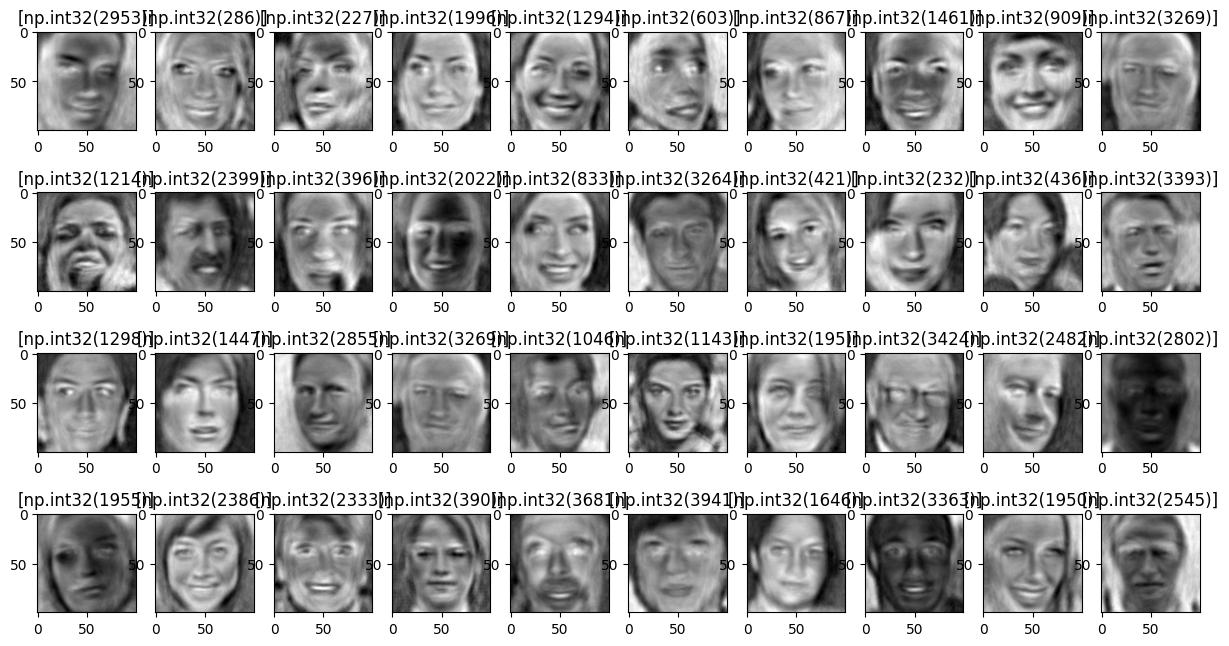

In [43]:
np.random.seed(1001)
pics = np.random.randint(0,len(pca_data_inv),40)
plt.figure(figsize= (15,8))

for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic : pic+1].reshape((100,100))
    plt.imshow(img , cmap = 'gray')
    plt.title(f"{y[pic]}")
    plt.xticks([])
    plt.yticks([])

plt.show()


print('*'*20 + "Eigen Image" + "="*20)

plt.figure(figsize = (15,8))
for i , pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic : pic+1].reshape((100,100))
    plt.imshow(img , cmap = 'gray')
    plt.title(f"{[pic]}")

plt.show()